В качестве набора данных для курсовой работы был выбран датасет, содержащий информацию об осадках в Австралии за последние 10 лет (https://www.kaggle.com/code/ysumut/rain-in-australia).

В датасете представлены подробные характеристики погодных условий, описанные в следующих колонках:

Date          -    	Дата наблюдения,	object<br>
Location      -    	Место наблюдения,	object<br>
MinTemp       -   	Минимальная суточная температура.	float64<br>
MaxTemp       -   	Максимальная суточная температура,	float64<br>
Rainfall      -  	Количество осадков, выпавших за день, мм,	float64<br>
Evaporation   -   	Уровень испарений за последние 24 час,а	float64<br>
Sunshine      -   	Количество часов яркого солнечного света в течение дня,	float64<br>
WindGustDir   -    	Направление самого сильного порыва ветра за 24 часа,	object<br>
WindGustSpeed -   	Скорость самого сильного порыва ветра за 24 часа,	float64<br>
WindDir9am    -    	Направление ветра в 9 часов утра,	object<br>
WindDir3pm    -    	Направление ветра в 3 часа дня,	object<br>
WindSpeed9am  -   	Скорость ветра в 9 часов утра,	float64<br>
WindSpeed3pm  -   	Скорость ветра в 3 часа дня,	float64<br>
Humidity9am   -   	Влажность в 9 часов утра,	float64<br>
Humidity3pm   -   	Влажность в 3 часа дня,	float64<br>
Pressure9am   -   	Атмосферное давление в 9 часов утра,	float64<br>
Pressure3pm   -   	Атмосферное давление в 3 часа дня,	float64<br>
Cloud9am      -   	Облачность в 9 часов утра,	float64<br>
Cloud3pm      -   	Облачность в 3 часа дня,	float64<br>
Temp9am       -   	Температура воздуха в 9 часов утра,	float64<br>
Temp3pm       -   	Температура воздуха в 3 часа дня,	float64<br>
RainToday     -    	Флаг дождя на текущий день,	object<br>
**RainTomorrow**  -    	Флаг дождя на следующий день. Целевая переменная,	object<br>

Все категориальные атрибуты, такие как описание направление ветра, могут быть заменены на числовые, что делает их сравнимыми друг с другом и даёт возможность легко использовать в анализе данных. На основе представленных характеристик мы будем решать задачу **классификации** - оценивать, ожидается дождь на следующий день или нет. 

------------------------------------------------

### 2. Загрузка и разведочный анализ данных. Кодирование категориальных признаков

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

/data/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('weather.csv', index_col=0) # Загружаем даатсет
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape # 142193 строки и 23 колонки

(142193, 23)

In [5]:
data.columns # Список колонок

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
# Типы данных
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
data.describe().T # Статистика по числовым признакам датасета

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [7]:
# Количество пропущенных значений в столбиках
data.isnull().sum()[data.isnull().sum()>0]

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

In [8]:
# Обработка числовых пропусков: заполняем средними значениями  
numeric_data = data.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

data = data.fillna(numeric_data_mean)

# Оставшиеся пустые категориальные признаки
data.isnull().sum()[data.isnull().sum()>0]

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

In [9]:
# Заполняем пропуски и кодируем категориальные значения

categorical = list(data.dtypes[data.dtypes == "object"].index)
data[categorical] = data[categorical].fillna("Unknown")

data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [10]:
data.head() # Что получилось

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [11]:
#Преобразуем бинарный целевой признак к числовому типу:
data['RainToday']=data['RainToday'].replace({'No':0,'Yes':1,'Unknown':-1})
data['RainTomorrow']=data['RainTomorrow'].replace({'No':0,'Yes':1,'Unknown':-1})

In [12]:
data['RainTomorrow'] = pd.to_numeric(data['RainTomorrow'])
y = data['RainTomorrow']

In [13]:
# Убираем ненужный признак с датой
data = data.drop(columns = 'Date')

In [54]:
# Изначальные значения признака Location
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [15]:
# Выполняем кодирование категориального признака
for feature in categorical:
    lab_enc = LabelEncoder()
    data[feature] = lab_enc.fit_transform(data[feature])

# Новые значения признака    
data['Location'].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [16]:
# Стандартизация

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = data.select_dtypes([np.number]).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [17]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.527004,0.189954,-0.045964,-0.207757,2.523152e-15,-4.221816e-15,1.164360,0.305648,1.269537,1.413689,...,0.113891,-1.435935,-1.475456,-1.220966,1.563959,-4.219974e-16,-0.013521,0.016412,-0.489417,-0.537551
1,-1.527004,-0.749174,0.263480,-0.278989,2.523152e-15,-4.221816e-15,1.366757,0.305648,-0.384935,1.618302,...,-1.312265,-1.289821,-1.045586,-1.116203,0.000000,-4.219974e-16,0.032832,0.380274,-0.489417,-0.537551
2,-1.527004,0.111694,0.347873,-0.278989,2.523152e-15,-4.221816e-15,1.569154,0.457874,1.269537,1.618302,...,-1.629188,-1.046299,-1.490279,-0.981508,0.000000,-1.189322e+00,0.619963,0.220175,-0.489417,-0.537551
3,-1.527004,-0.467436,0.671383,-0.278989,2.523152e-15,-4.221816e-15,-0.859609,-1.216614,0.235492,-1.655520,...,-1.259444,-1.728162,-0.007969,-0.367897,0.000000,-4.219974e-16,0.171889,0.700472,-0.489417,-0.537551
4,-1.527004,0.831692,1.276205,-0.160269,2.523152e-15,-4.221816e-15,1.164360,0.077309,-1.418981,-0.223223,...,0.694918,-0.900186,-1.015940,-1.385593,1.124991,1.661439e+00,0.125537,1.166215,-0.489417,-0.537551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,1.212249,-1.359608,-0.200686,-0.278989,2.523152e-15,-4.221816e-15,-1.669196,-0.683822,-1.212172,-1.655520,...,-0.519956,-1.192413,1.044472,0.889256,0.000000,-4.219974e-16,-1.172333,-0.114578,-0.489417,-0.537551
145455,1.212249,-1.469173,0.024364,-0.278989,2.523152e-15,-4.221816e-15,-1.669196,-0.683822,0.235492,-1.450907,...,-0.942521,-1.338526,1.029649,0.754561,0.000000,-4.219974e-16,-1.064177,0.103739,-0.489417,-0.537551
145456,1.212249,-1.343956,0.291611,-0.278989,2.523152e-15,-4.221816e-15,-0.454815,-1.368841,0.235492,-1.041679,...,-0.678418,-1.484639,0.866595,0.574967,0.000000,-4.219974e-16,-0.940571,0.409383,-0.489417,-0.537551
145457,1.212249,-1.062217,0.516661,-0.278989,2.523152e-15,-4.221816e-15,-1.062005,-0.227144,0.235492,1.413689,...,-0.836879,-1.338526,0.496017,0.230747,0.000000,-4.219974e-16,-0.693357,0.642254,-0.489417,-0.537551


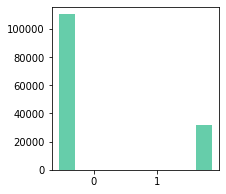

In [18]:
#Оценим дисбаланс классов по целевому признаку:
fig, ax = plt.subplots(figsize=(3,3))
plt.hist(data['RainTomorrow'], color='mediumaquamarine')
plt.show()

In [19]:
total = data.shape[0]
class_0, class_1 = data['RainTomorrow'].value_counts()
print('Target = 0:', round(class_0/total, 4)*100, "%")
print('Terget = 1:', round(class_1/total, 4)*100, "%")

Target = 0: 77.58 %
Terget = 1: 22.42 %


Как мы видим, в рассматриваемых данных присутствует приемлемый дисбаланс классов.

### 4. Корреляционный анализ данных и выбор признаков для построения моделей

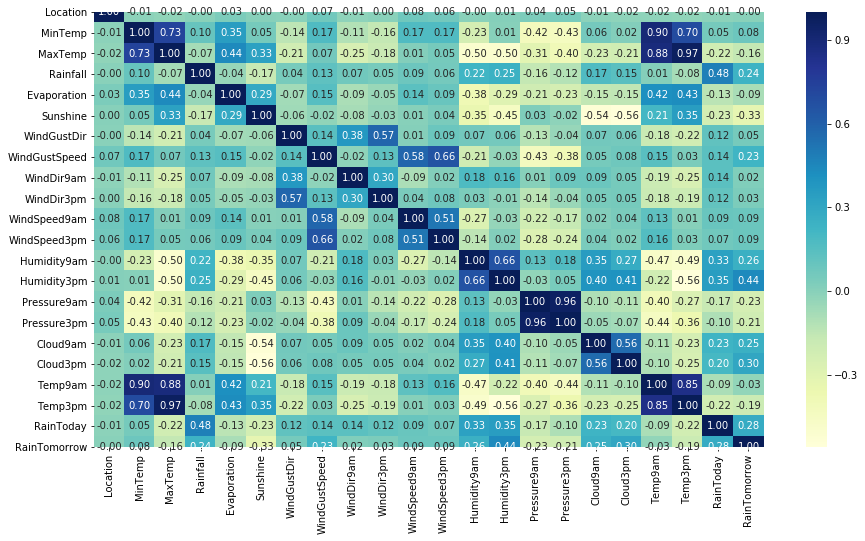

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

In [21]:
# Корреляция с целевым признаком
data.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327029
Pressure9am     -0.234027
Pressure3pm     -0.214688
Temp3pm         -0.190286
MaxTemp         -0.159087
Evaporation     -0.089551
Temp9am         -0.025582
Location        -0.003579
WindDir9am       0.024897
WindDir3pm       0.033852
WindGustDir      0.054093
MinTemp          0.083717
WindSpeed3pm     0.086909
WindSpeed9am     0.090524
WindGustSpeed    0.225264
Rainfall         0.236874
Cloud9am         0.253832
Humidity9am      0.255158
RainToday        0.280589
Cloud3pm         0.301841
Humidity3pm      0.439678
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [20]:
# Удалим признаки со слабой корреляцией
data = data.drop(columns = ['Location', 'Temp3pm', 'Temp9am'])

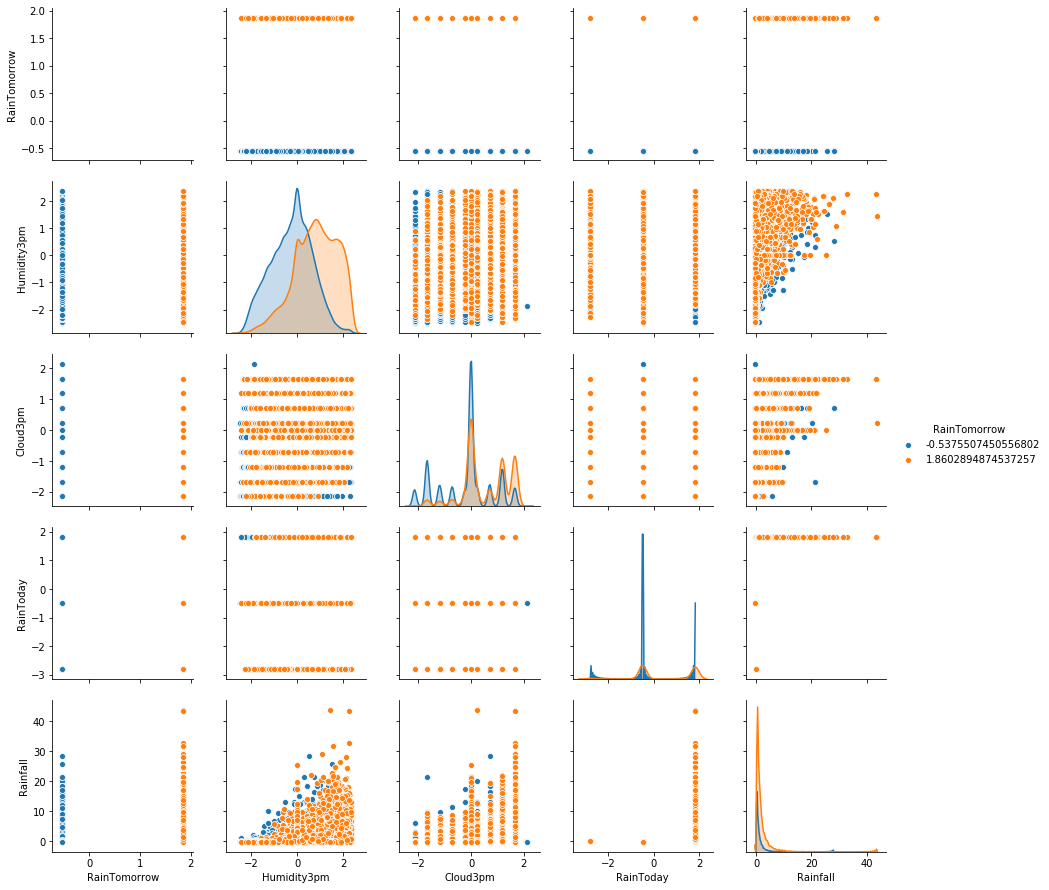

In [21]:
# Корреляция между целевым и наиболее влиятельными признаками:
sns.pairplot(data[['RainTomorrow', 'Humidity3pm', 'Cloud3pm', 'RainToday', 'Rainfall']], hue='RainTomorrow')

### 5. Выбор метрик для оценки качества моделей

В качестве метрик для решения задачи классификации будем использовать:

Метрики, формируемые на основе матрицы ошибок:  

1. Метрика precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Для подсчёта данной метрики используется функция precision_score.  
  
  
2. Метрика recall - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Для подсчёта используется функция recall_score.  
  
  
3. Метрика F1
Используется для объединения метрик precision и recall в единую метрику путём вычисления среднего гармонического значения.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при параметре β=1
Для вычисления используется функция f1_score.  
  
  
4. Метрика ROC AUC

Данная метрика основана на вычислении следующих характеристик:

TPR=TPTP+FN

- True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FPFP+TN

- False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.
Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

In [22]:
#Класс для сохранения и визуализации указанных метрик

class ShowMetrix:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

        
    def add(self, metric, alg, value): #Добавление значения

        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

        
    def get_data_for_metric(self, metric, ascending=True): #Формирование данных с фильтром по метрике

        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    
#     Строим графичек
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)): #Вывод графика

        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

------------------------------------

### 6. Выбор подходящих моделей для решения задачи классификации

Для задачи классификации будем использовать следующие модели:

- Метод ближайших соседей
- Линейная регрессия
- Решающее дерево
- Градиентный бустинг
- Случайный лес

### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных

На основе наших обработанных данных выделим тестовую и обучающую выборки:

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, :-1], y, test_size=0.20)
print (X_test.shape, Y_test.shape)
print (X_train.shape, Y_train.shape)

(28439, 18) (28439,)
(113754, 18) (113754,)


---------------------------------------------

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки

In [24]:
# Модели
clas_models = {'LogR': LogisticRegression(max_iter=45), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier(),
               'Tree':DecisionTreeClassifier()}

# Сохранение метрик
showMetrix = ShowMetrix()

In [25]:
#Функция для обучения и применения указанной модели, выводящая результаты в виде графиков

def clas_train_model(model_name, model, clasMetricLogger):
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)
    roc_auc = roc_auc_score(Y_test.values, Y_pred)
    
    showMetrix.add('precision', model_name, precision)
    showMetrix.add('recall', model_name, recall)
    showMetrix.add('f1', model_name, f1)
    showMetrix.add('roc_auc', model_name, roc_auc)


    print()
    print('-------------------------------------------------------------------------------------')
    print('-----------------------------------------------------')
    print(model)
    print('-----------------------------------------------------')
    print()
    
    print ('Оценка результатов')

    print()
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='accuracy')
    print('--------accuracy--------')
    print('Значения:', scores)
    print('Среднее:', np.mean(scores))
          
    print()
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='precision')
    print('--------precision--------')
    print('Значения:', scores)
    print('Среднее:', np.mean(scores)) 
          
    print()
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1_weighted')
    print('--------f1_weighted--------')
    print('Значения:', scores)
    print('Среднее:', np.mean(scores))          
    
    print()
    print('--------ROC AUC--------')
    
    draw_roc_curve(Y_test.values, Y_pred)
    
#     plot_confusion_matrix(model, X_test, Y_test.values, 
#                       display_labels=['0','1'], 
#                       cmap=plt.cm.Blues, normalize='true')
    
#     print()
#     print('--------Матрица ошибок--------')
#     plt.show()

In [26]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


-------------------------------------------------------------------------------------
-----------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=45,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.84453704 0.84221214 0.84183875]
Среднее: 0.8428626448451358

--------precision--------
Значения: [0.72541265 0.7200695  0.71749266]
Среднее: 0.7209916068499043

--------f1_weighted--------
Значения: [0.83330242 0.83048674 0.83027901]
Среднее: 0.8313560566039265

--------ROC AUC--------


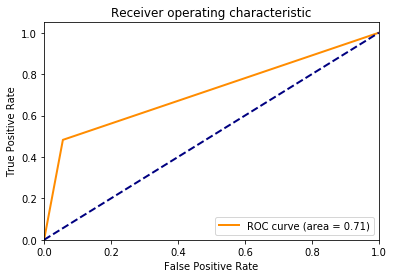


-------------------------------------------------------------------------------------
-----------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.83235317 0.83063453 0.82997073]
Среднее: 0.8309861421800698

--------precision--------
Значения: [0.6728     0.66703893 0.66533482]
Среднее: 0.6683912509612293

--------f1_weighted--------
Значения: [0.82259636 0.82087609 0.82011597]
Среднее: 0.8211961420303626

--------ROC AUC--------


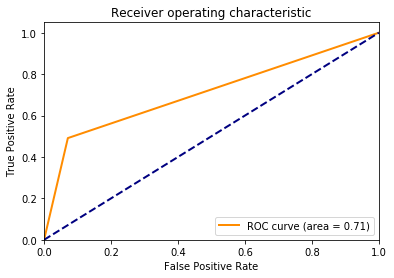


-------------------------------------------------------------------------------------
-----------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.84319207 0.84004958 0.84131129]
Среднее: 0.8415176443836513

--------precision--------
Значения: [0.73794474 0.72408118 0.72888728]
Среднее: 0.7303043994252287

--------f1_weighted--------
Значения: [0.82925414 0.82627926 0.82805937]
Среднее: 0.82786425789

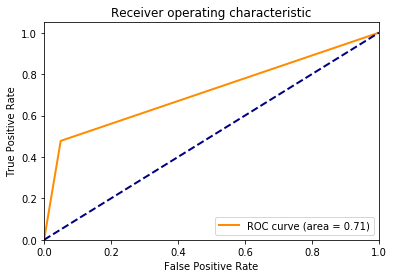


-------------------------------------------------------------------------------------
-----------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.84991693 0.8458252  0.84753541]
Среднее: 0.8477591787407747

--------p

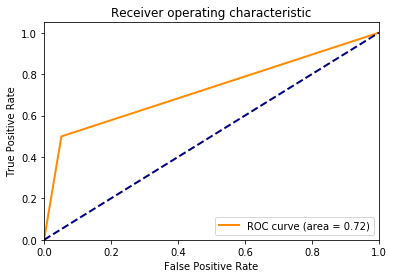


-------------------------------------------------------------------------------------
-----------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.78546375 0.78274171 0.78571617]
Среднее: 0.7846405423318551

--------precision--------
Значения: [0.51907449 0.51458169 0.51545341]
Среднее: 0.5163698655622201

--------f1_weighted--------
Значения: [0.78611333 0.78312856 0.78440018]
Среднее: 0.7845473574103025

--------ROC AUC--------


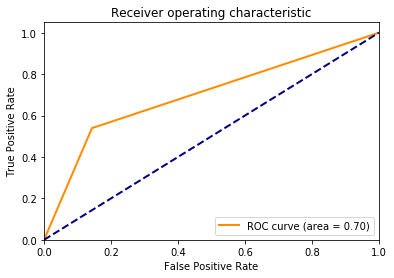

In [27]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, showMetrix)


-------------------------------------------------------------------------------------
-----------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.84298109 0.83962762 0.84210249]
Среднее: 0.8415703985916604

--------precision--------
Значения: [0.72559886 0.71585299 0.72770818]
Среднее: 0.7230533417676913

--------f1_weighted--------
Значения: [0.83154678 0.8256612  0.82813914]
Среднее: 0.82844903898

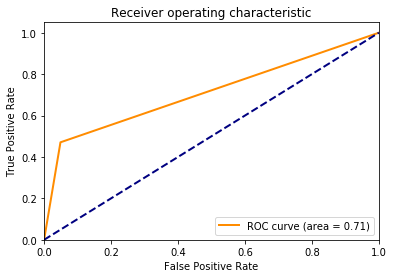

In [28]:
clas_train_model('RF', clas_models['RF'], showMetrix)


-------------------------------------------------------------------------------------
-----------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.78641314 0.7825571  0.78331619]
Среднее: 0.7840954771089089

--------precision--------
Значения: [0.5220788  0.51366487 0.51879614]
Среднее: 0.5181799391524784

--------f1_weighted--------
Значения: [0.7875195  0.78524287 0.78388768]
Среднее: 0.785550016610335

--------ROC AUC--------


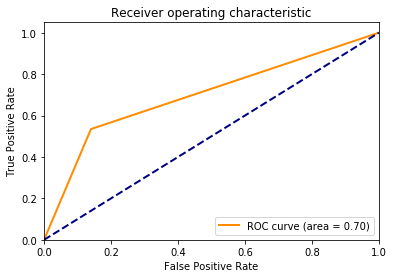

In [29]:
clas_train_model('Tree', clas_models['Tree'], showMetrix)


-------------------------------------------------------------------------------------
-----------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.84989056 0.8458252  0.84753541]
Среднее: 0.8477503880729477

--------p

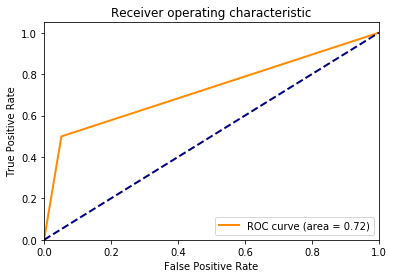

In [30]:
clas_train_model('GB', clas_models['GB'], showMetrix)

--------------------------

### 9. Подбор гиперпараметра для модели с использованием грид-сёрча

Выберем две лучшие модели (градиентый бустинг и случайный лес) и подберём для них оптимальные параметры, чтобы сделать качество предсказаний ещё выше.

In [ ]:
# Градиентный бустинг

In [27]:
tuned_parameters = [{'learning_rate': [0.05, 0.1, 0.2], 
                    'max_depth': [3, 5], 
                    'n_estimators': [100, 200]}]

In [29]:
%%time
clf_gs = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=3, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

CPU times: user 26min 1s, sys: 47.2 s, total: 26min 49s
Wall time: 16min 56s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [31]:
clf_gs.cv_results_

{'mean_fit_time': array([12.41279785, 23.54204345, 27.05823064, 49.5352126 , 11.39290961,
        20.70226208, 23.70388754, 45.5877986 , 10.32976627, 19.74704623,
        22.15302587, 43.56883979]),
 'std_fit_time': array([0.34739245, 0.94889583, 0.13197845, 1.51802593, 0.15540903,
        0.31424701, 0.43926085, 0.24395044, 0.21439911, 0.02469669,
        0.11462125, 1.31558539]),
 'mean_score_time': array([0.11650594, 0.21472788, 0.19830545, 0.29304353, 0.12048904,
        0.18494574, 0.19399659, 0.26650238, 0.09686025, 0.1715517 ,
        0.13933611, 0.26613196]),
 'std_score_time': array([0.00923415, 0.00904815, 0.00728343, 0.01124948, 0.00385285,
        0.01748719, 0.05450484, 0.0124881 , 0.00376858, 0.01182818,
        0.00504872, 0.00775489]),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,
                    0.2, 0.2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, 

In [34]:
clf_gs.best_score_

0.8547040104084253

In [35]:
clf_gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [ ]:
# Случайный лес

In [36]:
tuned_parameters = [{'bootstrap': [True, False], 
                    'max_depth': [None, 10, 20], 
                    'n_estimators': [10, 20]}]

In [37]:
%%time
clf_gs = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=3, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

CPU times: user 2min 10s, sys: 1.44 s, total: 2min 11s
Wall time: 1min 59s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [40]:
clf_gs.cv_results_

{'mean_fit_time': array([1.9232018 , 3.87729224, 1.12073382, 2.1554873 , 1.81910141,
        3.67192872, 2.85931778, 5.60596522, 1.49069866, 2.96915801,
        2.6323359 , 5.19025135]),
 'std_fit_time': array([0.01798834, 0.01668097, 0.03564629, 0.00899513, 0.00702885,
        0.02002853, 0.06216643, 0.05689417, 0.00816534, 0.0082183 ,
        0.0224406 , 0.01988896]),
 'mean_score_time': array([0.12603815, 0.25539923, 0.06733831, 0.12488254, 0.11598214,
        0.23657155, 0.13336674, 0.25424814, 0.06566906, 0.12268583,
        0.12300523, 0.23238611]),
 'std_score_time': array([1.79889650e-03, 9.43130817e-03, 5.40881902e-04, 8.86482478e-04,
        1.96950478e-03, 2.32396776e-02, 1.81912328e-03, 6.99005738e-03,
        2.34565001e-03, 2.15873468e-03, 8.18013956e-05, 4.69107533e-03]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, False, False,
                    False, False, False, False],
              mask=[False, False, False, False, False, False, Fa

In [39]:
print('Лучшее значение параметра:', clf_gs.best_params_)
print('Лучший показатель:', clf_gs.best_score_)

Лучшее значение параметра: {'bootstrap': False, 'max_depth': 20, 'n_estimators': 20}
Лучший показатель: 0.8497019885015032


----------------------------------------------------------

### Выбранные модели с оптимальными значениями гиперпараметров

In [30]:
new_clas_models = {'GB_opt':GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200),
                   'RF_opt':RandomForestClassifier(bootstrap = False, max_depth=20, n_estimators=20)
                  }


-------------------------------------------------------------------------------------
-----------------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.85320956 0.85444907 0.85450182]
Среднее: 0.8540534838335354

--------p

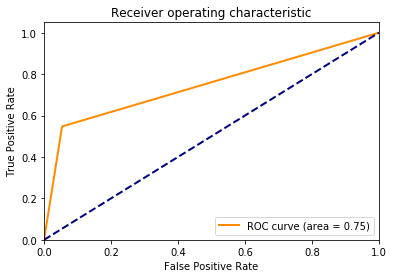


-------------------------------------------------------------------------------------
-----------------------------------------------------
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.85094151 0.84877894 0.85123161]
Среднее: 0.8503173514777501

--------precision--------
Значения: [0.74184326 0.73348978 0.72725777]
Среднее: 0.7341969346747588

--------f1_weighted--------
Значения: [0.84165229 0.83869272 0.84059048]
Среднее: 0.840311830348

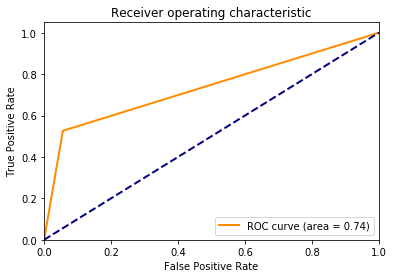

In [31]:
for model_name, model in model.items():
    clas_train_model(model_name, model, showMetrix)

In [37]:
new_clas_models['GB_opt']

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

------------------------------------------

### Формирование выводов о качестве построенных моделей на основе выбранных метрик

In [43]:
# Метрики качества модели
clas_metrics = showMetrix.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

Построим графики метрик качества моделей:

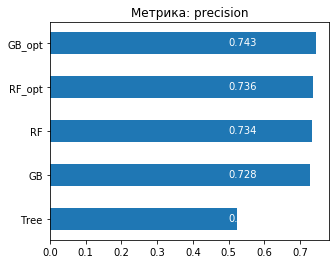

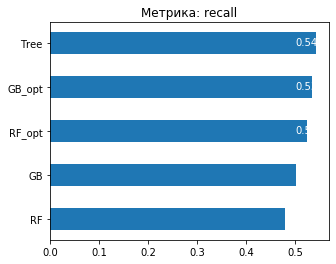

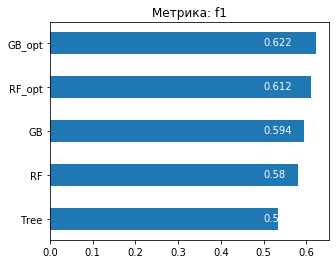

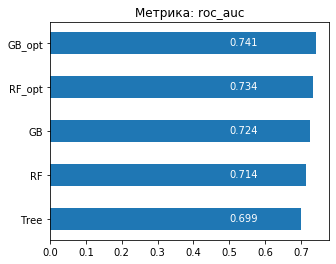

In [44]:
for metric in clas_metrics:
    showMetrix.plot('Метрика: ' + metric, metric, figsize=(5, 4))

Вывод: лучшие результаты работы (100%), подтверждённые всеми метриками, показали модели Решающее дерево, Градиентный бустинг и Случайный лес. Из трёх оставшихся на основании трёх метрик из четырёх наилучшей оказалась модель Линейной регрессии, позволив получить идеальный результат для рассматриваемой выборки за ограниченное число итеарций. Метод ближайших соседей показал наихудший результат, который не претерпел значительных улучшений даже при использовании оптимального параметра. 